In [17]:
!pip install tabulate

  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [18]:
import timeit
import random
import string
import matplotlib.pyplot as plt
import numpy as np
import tabulate

In [10]:
def merge_with_set(pred, new_chars):
    return ''.join(set(pred + new_chars))[:3]

def merge_char_by_char(pred, new_chars):
    result = pred
    for c in new_chars:
        if c not in result:
            result += c
            if len(result) >= 3:
                break
    return result[:3]

In [ ]:
def generate_test_data(num_samples, max_pred_len=2, max_new_chars_len=3):
    data = []
    for _ in range(num_samples):
        pred = ''.join(random.choices(string.ascii_lowercase, k=random.randint(0, max_pred_len)))
        new_chars = ''.join(random.choices(string.ascii_lowercase, k=random.randint(1, max_new_chars_len)))
        data.append((pred, new_chars))
    return data

def run_benchmark(max_samples=1000000, step=100000):
    sample_sizes = list(range(step, max_samples + step, step))
    set_times = []
    char_times = []
    
    for size in sample_sizes:
        test_data = generate_test_data(size)
        
        set_time = timeit.timeit(
            lambda: [merge_with_set(pred, new_chars) for pred, new_chars in test_data],
            number=1
        )
        set_times.append(set_time)
        
        char_time = timeit.timeit(
            lambda: [merge_char_by_char(pred, new_chars) for pred, new_chars in test_data],
            number=1
        )
        char_times.append(char_time)
        
        print(f"benchmarked {size} samples")
    
    return sample_sizes, set_times, char_times


In [11]:
def test_correctness():
    test_cases = [
        ("", "abc"),
        ("a", "bcd"),
        ("ab", "cde"),
        ("abc", "def"),
        ("aa", "aab"),
        ("aaa", "bbb")
    ]
    
    all_match = True
    for pred, new_chars in test_cases:
        set_result = merge_with_set(pred, new_chars)
        char_result = merge_char_by_char(pred, new_chars)
        
        if set_result != char_result:
            print(f"Mismatch for pred='{pred}', new_chars='{new_chars}':")
            print(f"  Set method: '{set_result}'")
            print(f"  Char method: '{char_result}'")
            all_match = False
    
    if all_match:
        print("All test cases match between the two methods!")
    

verifying equiv
Mismatch for pred='a', new_chars='bcd':
  Set method: 'dab'
  Char method: 'abc'
Mismatch for pred='aa', new_chars='aab':
  Set method: 'ab'
  Char method: 'aab'
Mismatch for pred='aaa', new_chars='bbb':
  Set method: 'ab'
  Char method: 'aaa'

running benchmark...
Completed benchmark for 100000 samples
Completed benchmark for 200000 samples
Completed benchmark for 300000 samples
Completed benchmark for 400000 samples
Completed benchmark for 500000 samples


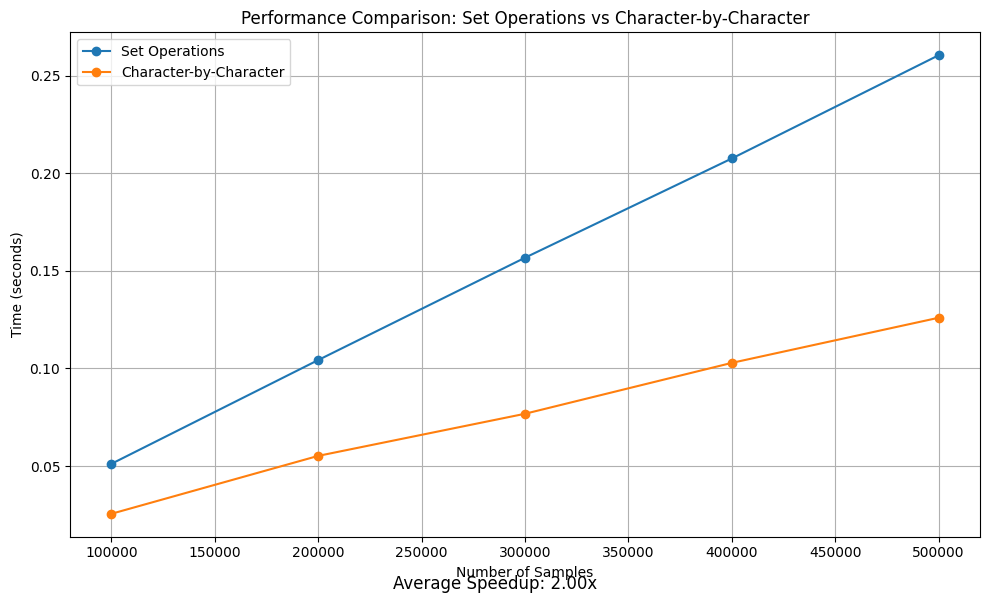


Detailed Results:
+-----------+---------------+--------------------+-----------+
|   Samples |   Set Ops (s) |   Char-by-Char (s) | Speedup   |
+===========+===============+====================+===========+
|    100000 |     0.0511565 |          0.0255636 | 2.00x     |
+-----------+---------------+--------------------+-----------+
|    200000 |     0.10431   |          0.0552271 | 1.89x     |
+-----------+---------------+--------------------+-----------+
|    300000 |     0.156727  |          0.0767983 | 2.04x     |
+-----------+---------------+--------------------+-----------+
|    400000 |     0.20756   |          0.102862  | 2.02x     |
+-----------+---------------+--------------------+-----------+
|    500000 |     0.260425  |          0.125976  | 2.07x     |
+-----------+---------------+--------------------+-----------+


In [19]:
print("verifying equiv")
test_correctness()

print("\nrunning benchmark...")

sample_sizes, set_times, char_times = run_benchmark(max_samples=500000, step=100000)

avg_speedup = np.mean(np.array(set_times) / np.array(char_times))

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, set_times, 'o-', label='Set Operations')
plt.plot(sample_sizes, char_times, 'o-', label='Character-by-Character')
plt.xlabel('Number of Samples')
plt.ylabel('Time (seconds)')
plt.title('Performance Comparison: Set Operations vs Character-by-Character')
plt.legend()
plt.grid(True)
plt.figtext(0.5, 0.01, f'Average Speedup: {avg_speedup:.2f}x', 
            ha='center', fontsize=12)
plt.tight_layout()
plt.show()


print("\nDetailed Results:")
headers = ["Samples", "Set Ops (s)", "Char-by-Char (s)", "Speedup"]
table = [
    [size, set_time, char_time, f"{speedup:.2f}x"]
    for size, set_time, char_time, speedup in zip(sample_sizes, set_times, char_times, np.array(set_times) / np.array(char_times))
]
print(tabulate.tabulate(table, headers=headers, tablefmt="grid"))